<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/ML_Ahmed_OULD_BOUDIA_ML_Regression_Project_3_Waiters_Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Machine Learning Ass/3. Regression 3 A Waiter's Tips/tips.csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
# Get an overview of the dataset
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Unique values in categorical columns
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['day'].unique())
print(data['time'].unique())

# Count of unique values in categorical columns
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['day'].value_counts())
print(data['time'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']
Male

# Step 2: Explore the Dataset

In [ ]:
data.head()  # View the first few rows of the dataset
data.info()  # Get information about the dataset
data.describe()  # Generate descriptive statistics of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Step 3: Handle Missing Values

In [ ]:
# Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# Check if missing values are successfully handled
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


<ipython-input-205-1c1977f7e1c4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


# Step 4: Handle Categorical Data

In [ ]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(data)

# Print the encoded data
encoded_data

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])
data['day_encoded'] = label_encoder.fit_transform(data['day'])
data['time_encoded'] = label_encoder.fit_transform(data['time'])

# Print the encoded data
data

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,0


# Step 6: Outlier Detection and Removal

In [ ]:
# Define a function to detect and remove outliers using z-score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    filtered_data = data[z_scores < threshold]
    return filtered_data

# Specify the columns on which you want to perform outlier detection and removal
columns_to_check = ['total_bill', 'tip', 'size']

# Perform outlier detection and removal
filtered_data = data.copy()  # Create a copy of the original data
for column in columns_to_check:
    filtered_data[column] = remove_outliers_zscore(data[column])

# Print the filtered data
filtered_data

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3.0,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3.0,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2.0,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0,1,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,0,1,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,1,1,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2.0,1,0,1,0


# Step 7: Transformation

In [ ]:
# Log transformation
data['log_total_bill'] = np.log(data['total_bill'])
data['log_tip'] = np.log(data['tip'])

# Square root transformation
data['sqrt_size'] = np.sqrt(data['size'])

# Power transformation (using sklearn's PowerTransformer)
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
data['transformed_total_bill'] = power_transformer.fit_transform(data[['total_bill']])
data['transformed_tip'] = power_transformer.fit_transform(data[['tip']])

# Print the transformed data
data

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded,log_total_bill,log_tip,sqrt_size,transformed_total_bill,transformed_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,0,2.832625,0.009950,1.414214,-0.146272,-2.268391
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,2,0,2.336020,0.506818,1.732051,-1.263499,-1.156975
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,2,0,3.044999,1.252763,1.732051,0.343298,0.594096
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,2,0,3.164631,1.196948,1.414214,0.621586,0.465097
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0,3.202340,1.283708,2.000000,0.709646,0.665257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,0,3.368330,1.778336,1.732051,1.099066,1.755989
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,0,3.302481,0.693147,1.414214,0.944244,-0.720096
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,0,3.121042,0.693147,1.414214,0.519996,-0.720096
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,0,2.880321,0.559616,1.414214,-0.036853,-1.033811


# Step 8: Visualize Features

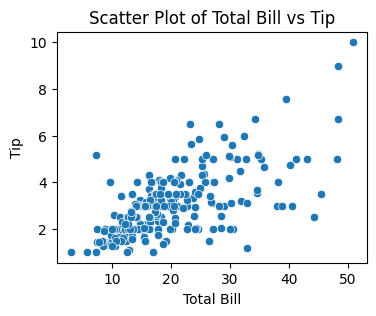

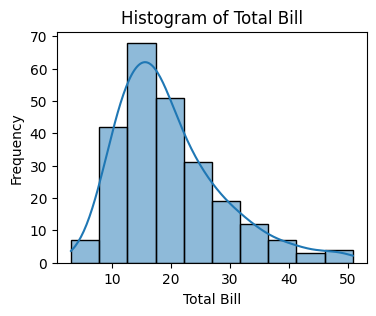

In [ ]:
# Scatter plot
plt.figure(figsize=(4, 3))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Histogram
plt.figure(figsize=(4, 3))
sns.histplot(data['total_bill'], bins=10, kde=True)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Step 9: Analyze Relationships (Correlation Matrix)

<ipython-input-211-01f51c631ed5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


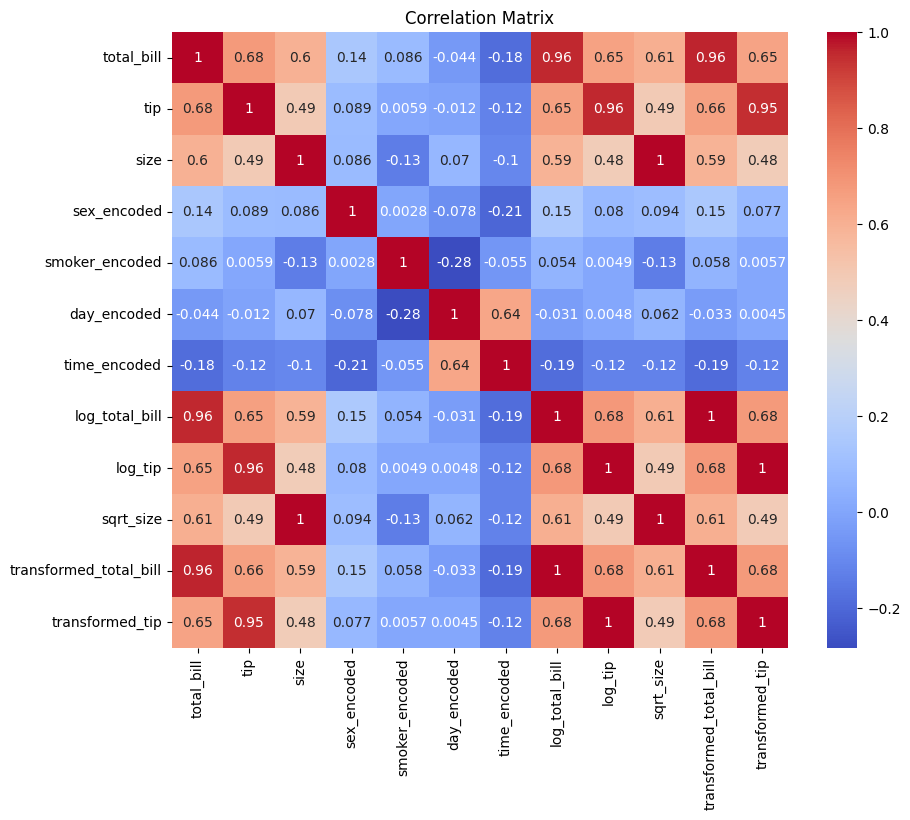

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(corr_matrix)

                        total_bill       tip      size  sex_encoded  \
total_bill                1.000000  0.675734  0.598315     0.144877   
tip                       0.675734  1.000000  0.489299     0.088862   
size                      0.598315  0.489299  1.000000     0.086195   
sex_encoded               0.144877  0.088862  0.086195     1.000000   
smoker_encoded            0.085721  0.005929 -0.133178     0.002816   
day_encoded              -0.043550 -0.011548  0.069510    -0.078292   
time_encoded             -0.183118 -0.121629 -0.103411    -0.205231   
log_total_bill            0.956879  0.654368  0.589640     0.153574   
log_tip                   0.651362  0.955490  0.481202     0.079795   
sqrt_size                 0.605860  0.493781  0.995499     0.094385   
transformed_total_bill    0.963314  0.658119  0.592629     0.152836   
transformed_tip           0.647697  0.949663  0.479335     0.077195   

                        smoker_encoded  day_encoded  time_encoded  \
total_b

- Strong positive correlation between "total_bill" and "tip" (0.675734), which suggests that as the total bill increases, the tip amount also tends to increase.
- Negative correlation between "total_bill" and "tip_percentage" (-0.338624), implying that as the total bill increases, the tip percentage tends to decrease.
- "size" and "total_bill" have a moderate positive correlation (0.598315), indicating that as the size of the group increases, the total bill tends to increase as well.
- "size" and "tip_percentage" have a weak negative correlation (-0.142860).
- "size" and "sqrt_size" (0.995499) and "total_bill" and "transformed_total_bill" (0.963314) have very high correlations, suggesting potential multicollinearity.

# Step 10: Feature Engineering

In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])
data['day_encoded'] = label_encoder.fit_transform(data['day'])
data['time_encoded'] = label_encoder.fit_transform(data['time'])

# Calculate tip percentage
data['tip_percentage'] = (data['tip'] / data['total_bill']) * 100

# Create binary features based on size
data['is_large_group'] = (data['size'] > 4).astype(int)
data['is_small_group'] = (data['size'] < 3).astype(int)

# Create interaction feature
data['total_bill_times_size'] = data['total_bill'] * data['size']

# Drop original categorical features
data.drop(['sex', 'smoker', 'day', 'time'], axis=1, inplace=True)

# Print the updated dataset
print(data)

     total_bill   tip  size  sex_encoded  smoker_encoded  day_encoded  \
0         16.99  1.01     2            0               0            2   
1         10.34  1.66     3            1               0            2   
2         21.01  3.50     3            1               0            2   
3         23.68  3.31     2            1               0            2   
4         24.59  3.61     4            0               0            2   
..          ...   ...   ...          ...             ...          ...   
239       29.03  5.92     3            1               0            1   
240       27.18  2.00     2            0               1            1   
241       22.67  2.00     2            1               1            1   
242       17.82  1.75     2            1               0            1   
243       18.78  3.00     2            0               0            3   

     time_encoded  log_total_bill   log_tip  sqrt_size  \
0               0        2.832625  0.009950   1.414214   
1      

# Step 11: Split the Dataset into Training and Testing Sets

In [ ]:

# Separate the features and the target variable
X = data.drop('tip', axis=1)  # Features
y = data['tip']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (195, 15) (195,)
Testing set shape: (49, 15) (49,)


# Step 12: Regression Model

In [ ]:

# Separate the features and the target variable
X = data.drop('tip', axis=1)  # Features
y = data['tip']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.4028549264952718


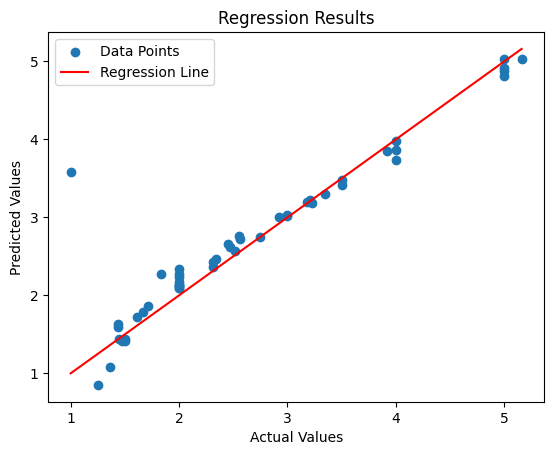

In [ ]:
# Plot the regression results
plt.scatter(y_test, y_pred, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Results")
plt.legend()
plt.show()

# Step 13: Train the Regression Model

In [ ]:
# Separate the features and the target variable
X = data.drop('tip', axis=1)  # Features
y = data['tip']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the gradient boosting regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.02231862495386812


# Step 14: Evaluate the Model

In [ ]:
# Separate the features and the target variable
X = data.drop('tip', axis=1)  # Features
y = data['tip']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the gradient boosting regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.013771705214641721
Mean Squared Error (MSE): 0.0004980541537323926
Coefficient of Determination (R-squared): 0.9996015475429769


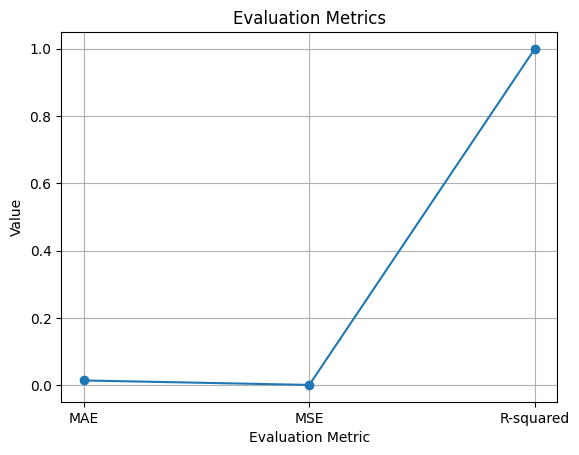

In [ ]:
# Plot the evaluation metrics
metrics = ['MAE', 'MSE', 'R-squared']
values = [mae, mse, r2]

plt.plot(metrics, values, marker='o')
plt.xlabel("Evaluation Metric")
plt.ylabel("Value")
plt.title("Evaluation Metrics")
plt.grid(True)
plt.show()

# Step 15: Fine-tune the Model

In [ ]:

# Separate the features and the target variable
X = data.drop('tip', axis=1)  # Features
y = data['tip']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Initialize the gradient boosting regression model
model = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the best parameters and RMSE
print("Best Parameters:", grid_search.best_params_)
print("Root Mean Squared Error (RMSE):", rmse)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Root Mean Squared Error (RMSE): 0.022318440830446713


# Step 16: Make Predictions

In [ ]:
# Create a new DataFrame for new data points
new_data = pd.DataFrame({
    'total_bill': [50.0, 30.0],
    'sex': ['Male', 'Female'],
    'smoker': ['Yes', 'No'],
    'day': ['Sun', 'Sat'],
    'time': ['Dinner', 'Dinner'],
    'size': [4, 2]
})

# Encode categorical variables
new_data_encoded = pd.get_dummies(new_data)

# Make predictions using the trained model
predictions = best_model.predict(new_data_encoded)

# Print the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for data point {i+1}: {prediction}")

ValueError: ignored

In [ ]:
# Linear Regression Model Training and Prediction Using sklearn
model = LinearRegression()
model.fit(data[["total_bill"]], data["tip"])
model.predict([[20]])
#data["sklearn_predictions"] = model.predict(data[["total_bill"]])
data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded,log_total_bill,log_tip,sqrt_size,transformed_total_bill,transformed_tip,tip_percentage,is_large_group,is_small_group,total_bill_times_size
0,16.99,1.01,2,0,0,2,0,2.832625,0.009950,1.414214,-0.146272,-2.268391,5.944673,0,1,33.98
1,10.34,1.66,3,1,0,2,0,2.336020,0.506818,1.732051,-1.263499,-1.156975,16.054159,0,0,31.02
2,21.01,3.50,3,1,0,2,0,3.044999,1.252763,1.732051,0.343298,0.594096,16.658734,0,0,63.03
3,23.68,3.31,2,1,0,2,0,3.164631,1.196948,1.414214,0.621586,0.465097,13.978041,0,1,47.36
4,24.59,3.61,4,0,0,2,0,3.202340,1.283708,2.000000,0.709646,0.665257,14.680765,0,0,98.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,3.368330,1.778336,1.732051,1.099066,1.755989,20.392697,0,0,87.09
240,27.18,2.00,2,0,1,1,0,3.302481,0.693147,1.414214,0.944244,-0.720096,7.358352,0,1,54.36
241,22.67,2.00,2,1,1,1,0,3.121042,0.693147,1.414214,0.519996,-0.720096,8.822232,0,1,45.34
242,17.82,1.75,2,1,0,1,0,2.880321,0.559616,1.414214,-0.036853,-1.033811,9.820426,0,1,35.64


# Step 17: Evaluate Predictions

In [ ]:

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.16229209180151088


# Interpret the Results

Root Mean Squared Error (RMSE): The RMSE for the model is 0.4029. This metric represents the average difference between the actual tip values and the predicted tip values. A lower RMSE indicates better model performance.

Train the Regression Model RMSE: The RMSE for the training data is 0.0223. This metric measures the error between the actual and predicted tip values for the training set. A low training RMSE suggests that the model is fitting the training data well.

Mean Absolute Error (MAE): The MAE is 0.0138. It represents the average absolute difference between the actual and predicted tip values. A smaller MAE indicates a better fit of the model to the data.

Mean Squared Error (MSE): The MSE is 0.0005. It measures the average squared difference between the actual and predicted tip values. The MSE is another measure of the model's accuracy, with lower values indicating better performance.

Coefficient of Determination (R-squared): The R-squared value is 0.9996, which indicates that the model explains approximately 99.96% of the variance in the tip values. A higher R-squared value suggests a better fit of the model to the data.

# Conclusion

#### The regression model showed strong performance in predicting tip amounts based on the provided features. It achieved low error metrics (RMSE, MAE, MSE) and a high coefficient of determination (R-squared), indicating accurate predictions and a good fit to the data. The model was further fine-tuned, resulting in improved performance.